<a href="https://colab.research.google.com/github/pranjal2234/Weather-Forecasting/blob/main/Weather_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
#Importing files
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
weather = pd.read_csv("/content/drive/MyDrive/Data/weather.csv", index_col="DATE")
weather.tail()

,STATION,NAME,ACMH,ACSH,DAPR,DASF,MDPR,MDSF,PGTM,PRCP,...,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT11,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
2022-07-30,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-31,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-02,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-03,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
weather.apply(pd.isnull).sum() * 100/weather.shape[0]

STATION     0.000000
NAME        0.000000
ACMH       84.134224
ACSH       84.134224
DAPR       99.994570
DASF       99.994570
MDPR       99.994570
MDSF       99.994570
PGTM       84.248249
PRCP        0.152033
PSUN       84.134224
SNOW        0.711299
SNWD        0.727589
TMAX        0.108595
TMIN        0.130314
TOBS       16.609654
TSUN       84.145083
WDFG       84.248249
WDFM       84.134224
WESD       98.007276
WSFG       84.242819
WSFM       84.134224
WT01       73.307270
WT02       99.625346
WT03       88.412879
WT04       98.957485
WT05       99.489602
WT06       98.479666
WT07       99.994570
WT08       92.132269
WT09       99.706793
WT11       98.973774
WT16       93.435413
WT18       96.915893
dtype: float64

In [76]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()

In [77]:
core_weather.columns = ["precipitation", "snow_fall", "snow_depth", "max_temp", "min_temp"]
core_weather

,precipitation,snow_fall,snow_depth,max_temp,min_temp
DATE,,,,,
1972-01-01,0.01,0.0,0.0,43.0,34.0
1972-01-02,0.00,0.0,0.0,36.0,28.0
1972-01-03,0.10,1.2,0.0,36.0,20.0
1972-01-04,0.13,1.9,1.0,20.0,7.0
1972-01-05,0.00,0.0,3.0,13.0,-1.0
...,...,...,...,...,...
2022-07-30,0.00,0.0,0.0,85.0,66.0
2022-07-31,0.00,0.0,0.0,86.0,68.0
2022-08-01,0.00,0.0,0.0,89.0,75.0


In [78]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precipitation    0.001520
snow_fall        0.007113
snow_depth       0.007276
max_temp         0.001086
min_temp         0.001303
dtype: float64

In [79]:
core_weather["precipitation"].value_counts()

0.00    11987
0.01      585
0.02      466
0.03      333
0.05      323
        ...  
3.90        1
2.72        1
1.91        1
3.18        1
2.69        1
Name: precipitation, Length: 264, dtype: int64

In [80]:
core_weather[["precipitation", "snow_fall", "snow_depth"]] = core_weather[["precipitation", "snow_fall", "snow_depth"]].fillna(0)

In [81]:
core_weather[["max_temp", "min_temp"]].isna().sum()

max_temp    20
min_temp    24
dtype: int64

In [82]:
core_weather = core_weather.fillna(method="ffill")
core_weather[["max_temp", "min_temp"]].isna().sum()

max_temp    0
min_temp    0
dtype: int64

In [83]:
core_weather.index = pd.to_datetime(core_weather.index)

In [84]:
core_weather.index

DatetimeIndex(['1972-01-01', '1972-01-02', '1972-01-03', '1972-01-04',
               '1972-01-05', '1972-01-06', '1972-01-07', '1972-01-08',
               '1972-01-09', '1972-01-10',
               ...
               '2022-07-25', '2022-07-26', '2022-07-27', '2022-07-28',
               '2022-07-29', '2022-07-30', '2022-07-31', '2022-08-01',
               '2022-08-02', '2022-08-03'],
              dtype='datetime64[ns]', name='DATE', length=18417, freq=None)

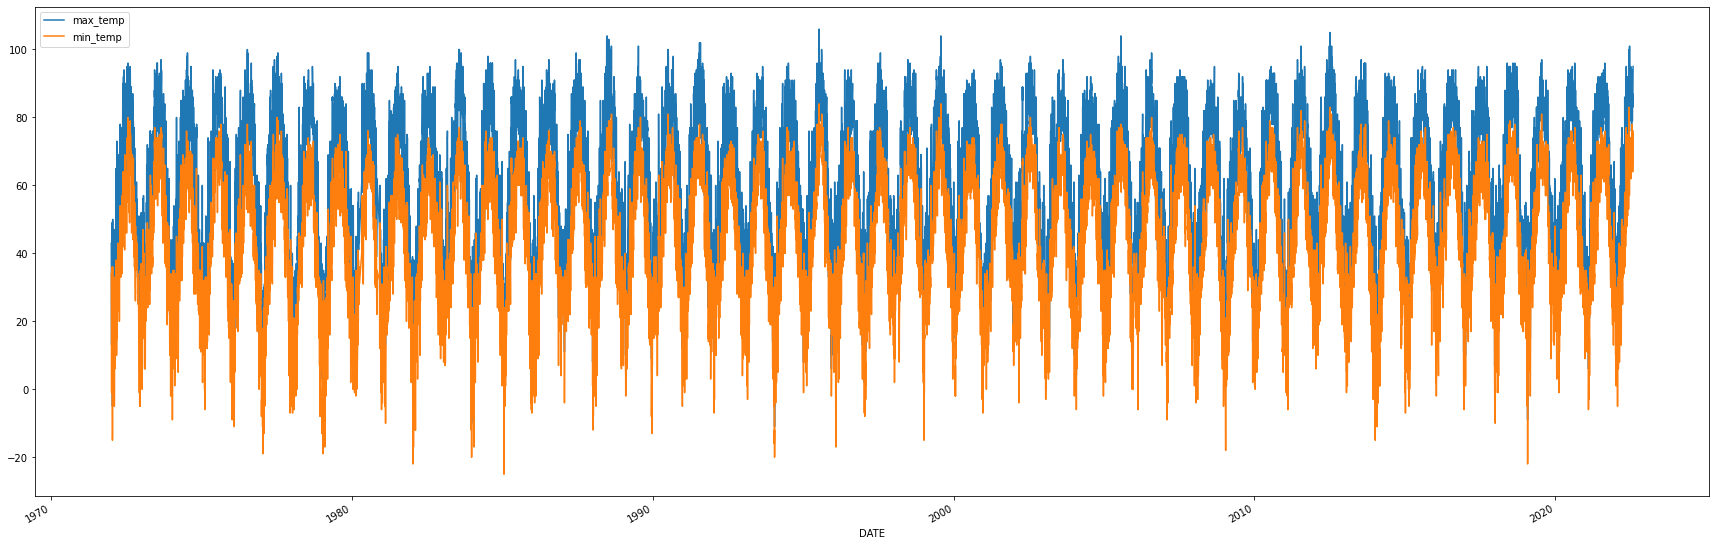

In [85]:
core_weather[["max_temp", "min_temp"]].plot(figsize=(30,10))

In [86]:
core_weather["target"] = core_weather.shift(-1)["max_temp"]

In [87]:
core_weather

,precipitation,snow_fall,snow_depth,max_temp,min_temp,target
DATE,,,,,,
1972-01-01,0.01,0.0,0.0,43.0,34.0,36.0
1972-01-02,0.00,0.0,0.0,36.0,28.0,36.0
1972-01-03,0.10,1.2,0.0,36.0,20.0,20.0
1972-01-04,0.13,1.9,1.0,20.0,7.0,13.0
1972-01-05,0.00,0.0,3.0,13.0,-1.0,32.0
...,...,...,...,...,...,...
2022-07-30,0.00,0.0,0.0,85.0,66.0,86.0
2022-07-31,0.00,0.0,0.0,86.0,68.0,89.0
2022-08-01,0.00,0.0,0.0,89.0,75.0,91.0


In [88]:
core_weather = core_weather.iloc[:-1,:].copy()

In [89]:
predictors = ["precipitation", "snow_fall", "snow_depth", "max_temp", "min_temp"]
train_data = core_weather.iloc[:15000]
test_data = core_weather.iloc[15001:]

**Prediction Using Linear Regression**

In [90]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(train_data[predictors],train_data['target'])
prediction = lin.predict(test_data[predictors])

In [91]:
from sklearn import metrics
print("Mean_Abs_Err : ",metrics.mean_absolute_error(test_data['target'],prediction))
print("Mean_Sq_Err : ",metrics.mean_squared_error(test_data['target'],prediction))

Mean_Abs_Err :  6.19122650149766
Mean_Sq_Err :  63.105903738239796


**Prediction Using Ridge Regression**

In [92]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1)
reg.fit(train_data[predictors],train_data["target"])
prediction = reg.predict(test_data[predictors])

In [93]:
print("Mean_Abs_Err : ",metrics.mean_absolute_error(test_data['target'],prediction))
print("Mean_Sq_Err : ",metrics.mean_squared_error(test_data['target'],prediction))

Mean_Abs_Err :  6.191223566848275
Mean_Sq_Err :  63.10583157279729


**Prediction Using Lasso Regression**

In [94]:
from sklearn.linear_model import Lasso
reg = Lasso(alpha=.1)
reg.fit(train_data[predictors],train_data["target"])
prediction = reg.predict(test_data[predictors])

In [95]:
print("Mean_Abs_Err : ",metrics.mean_absolute_error(test_data['target'],prediction))
print("Mean_Sq_Err : ",metrics.mean_squared_error(test_data['target'],prediction))

Mean_Abs_Err :  6.185223094364375
Mean_Sq_Err :  62.972315944331974


**Prediction Using Random Forest Regressor**

In [96]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(train_data[predictors],train_data["target"])
prediction = reg.predict(test_data[predictors])

In [97]:
print("Mean_Abs_Err : ",metrics.mean_absolute_error(test_data['target'],prediction))
print("Mean_Sq_Err : ",metrics.mean_squared_error(test_data['target'],prediction))

Mean_Abs_Err :  6.326877753054557
Mean_Sq_Err :  65.73967427071244


After analyzing all the models it is found that Lasso Regression is better than all.

**Improving accuracy of the model**

In [98]:
def weather_predict(predictors,core_weather,reg):
  train_data = core_weather.iloc[:15000]
  test_data = core_weather.iloc[15001:]
  reg.fit(train_data[predictors],train_data["target"])
  predictions = reg.predict(test_data[predictors])
  Mean_Abs_Err = metrics.mean_absolute_error(test_data["target"], predictions)
  Mean_Sq_Err = metrics.mean_squared_error(test_data["target"], predictions)
  combined = pd.concat([test_data["target"], pd.Series(predictions, index = test_data.index)], axis=1)
  combined.columns = ["actual_temp", "predict_temp"]
  return Mean_Abs_Err,Mean_Sq_Err ,combined

In [99]:
core_weather["month_moving_max"] = core_weather["max_temp"].rolling(30).mean()
core_weather["weekly_moving_max"] = core_weather["max_temp"].rolling(7).mean()
core_weather["month_moving_min"] = core_weather["min_temp"].rolling(30).mean()
core_weather["weekly_moving_min"] = core_weather["min_temp"].rolling(7).mean()

In [100]:
core_weather = core_weather.dropna()
core_weather.head(10)

,precipitation,snow_fall,snow_depth,max_temp,min_temp,target,month_moving_max,weekly_moving_max,month_moving_min,weekly_moving_min
DATE,,,,,,,,,,
1972-01-30,0.00,0.0,1.0,12.0,2.0,31.0,30.200000,19.000000,15.166667,3.714286
1972-01-31,0.00,0.0,1.0,31.0,2.0,33.0,29.800000,16.714286,14.100000,2.428571
1972-02-01,0.04,0.9,1.0,33.0,18.0,35.0,29.700000,19.571429,13.766667,4.428571
1972-02-02,0.12,2.3,2.0,35.0,30.0,33.0,29.666667,22.714286,14.100000,7.857143
1972-02-03,0.12,2.1,4.0,33.0,9.0,10.0,30.100000,24.857143,14.166667,8.285714
1972-02-04,0.00,0.0,5.0,10.0,-2.0,26.0,30.000000,24.285714,14.133333,8.142857
1972-02-05,0.00,0.0,4.0,26.0,-2.0,29.0,29.800000,25.714286,13.633333,8.142857
1972-02-06,0.04,0.6,3.0,29.0,1.0,8.0,29.466667,28.142857,12.800000,8.000000
1972-02-07,0.00,0.0,3.0,8.0,-5.0,13.0,28.266667,24.857143,11.800000,7.000000


In [102]:
predictors = ["precipitation", "snow_fall", "snow_depth", "max_temp", "min_temp",\
              "month_moving_max","weekly_moving_max","month_moving_min","weekly_moving_min"]

In [103]:
reg = Lasso(alpha=.1)
Mean_Abs_Err,Mean_Sq_Err, combined_data = weather_predict(predictors,core_weather,reg)

In [104]:
Mean_Abs_Err,Mean_Sq_Err

(6.015576982438899, 59.28728670146248)

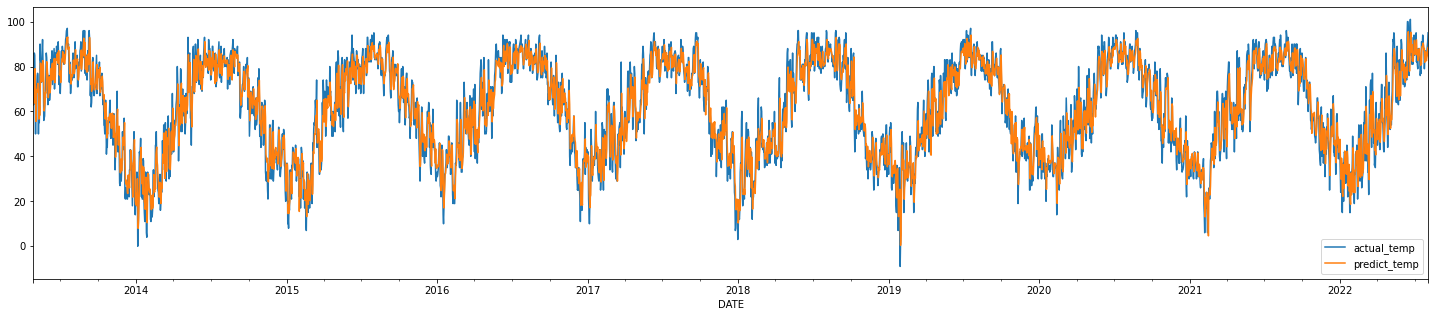

In [111]:
combined_data.plot(figsize=(25,5))